# What is facts impact unemployment rate?
Jingzhi Kao
z5292255

In [90]:
import time
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [91]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [92]:
# load file to the pandas
filepath = 'Sheet_1_data_rateby-maleandfemale-education.csv'

df = pd.read_csv(filepath)
df.sample(10)



,Gender,Educational attainment,Year of Period (group),Month of Period,Percent unemployed
37,Female,Associate's degree,2020,May,0.147
86,Male,Some college,2020,January,0.036
117,Male,Bachelor's degree or higher,2021,March,0.037
63,Male,High school or less,2020,September,0.091
62,Male,High school or less,2020,October,0.082
17,Female,Some college,2020,October,0.079
61,Male,High school or less,2020,November,0.080
53,Female,Bachelor's degree or higher,2020,April,0.094
58,Female,Bachelor's degree or higher,2021,February,0.039
79,Male,Some college,2020,August,0.084


In [93]:
# identify variables,which means education values from males and females
data_list_n = {
    'High school or less':0 , 'Some college':0, "Associate's degree":0, "Bachelor's degree or higher":0
}
data_list_v = {
    'High school or less':0 , 'Some college':0, "Associate's degree":0, "Bachelor's degree or higher":0
}


# na menas list of gender,pl means list of percentage,z means all percentage,xeu means education list,labels means list of education by different gender
na = df['Gender'].values.tolist()
pl = df['Percent unemployed'].values.tolist()
z = 0
for i in pl:
    z+=i

xeu = df['Educational attainment'].values.tolist()
labels = df['Educational attainment'].drop_duplicates().values.tolist()

labels

['High school or less',
 'Some college',
 "Associate's degree",
 "Bachelor's degree or higher"]

In [94]:
#  calculate percentage of different sex and education. keep it to the difnation
for i,j in enumerate(xeu):
    if na[i] == 'Female':
        data_list_v[j]+=pl[i]
    else:
        data_list_n[j]+=pl[i]
for key,value in data_list_v.items():
       data_list_v[key]= float("%.2f" % ((value/z)*100))
for key,value in data_list_n.items():
       data_list_n[key]= float("%.2f" % ((value/z)*100))

In [95]:
data_list_v

{'High school or less': 17.34,
 'Some college': 15.37,
 "Associate's degree": 11.66,
 "Bachelor's degree or higher": 8.1}

In [96]:
data_list_n

{'High school or less': 15.73,
 'Some college': 13.71,
 "Associate's degree": 10.8,
 "Bachelor's degree or higher": 7.29}

In [97]:
plt.figure(figsize=(18, 10))
# build calibration label and data of x-axis

first = [x for x in data_list_n.values()]
second = [x for x in data_list_v.values()]

<Figure size 1296x720 with 0 Axes>

In [98]:
first

[15.73, 13.71, 10.8, 7.29]

In [99]:
second

[17.34, 15.37, 11.66, 8.1]

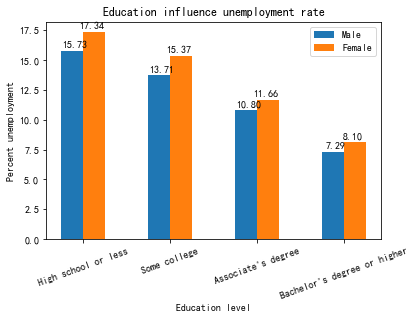

In [100]:
# Do basic chart building

x = np.arange(len(labels))  # X axis scale label position
width = 0.25  # Width of column
# Calculate the position of each column on the X-axis, ensuring that the X-axis scale label is centered
# x - width/2，x + width/2The position of each set of data on the X-axis
plt.bar(x - width/2, first, width, label='Male')
plt.bar(x + width/2, second, width, label='Female')


# Optimize the display of charts

plt.ylabel('Percent unemployment')
plt.title('Education influence unemployment rate')
# The axis scale label position is not calculated

for X,y in zip(x,first):
    plt.text(X-0.1,y+0.2,'%.2f' %y, ha='center',va='bottom')

for X, y in zip(x, second):
    plt.text(X+0.1,y+0.2,'%.2f'%y, ha='center',va='bottom')
plt.legend(loc='upper right')
plt.xticks(x, labels=labels,rotation=20)
plt.xlabel('Education level')

plt.show()


graph 2

In [101]:
filepath = ("1978-2017-australiansdg-indicator-8-5-2a-females.csv")

female = pd.read_csv(filepath)
print("done")

done


In [102]:
female.head(10)

,Month,Females 15-24 unemployment rate (%),Females 25-34 unemployment rate (%),Females 35-44 unemployment rate (%),Females 45-54 unemployment rate (%),Females 55-64 unemployment rate (%),Females 65 and over unemployment rate (%),Females 15 and over unemployment rate (%),Females 15-64 unemployment rate (%)
0,Dec-78,15.5,5.3,4.4,3.6,2.0,-,8.1,8.2
1,Dec-79,14.0,6.7,4.3,3.5,2.7,1,8.1,8.2
2,Dec-80,13.8,6.4,3.7,3.5,2.9,1,8.0,8.0
3,Dec-81,13.0,5.9,4.7,3.4,2.2,1.8,7.6,7.7
4,Dec-82,17.1,7.8,6.1,4.7,2.8,0.8,10.1,10.2
5,Dec-83,16.1,8.9,6.4,4.4,2.7,0.4,9.8,9.9
6,Dec-84,15.3,6.9,5.9,4.6,3.0,1.2,8.9,9.0
7,Dec-85,14.6,7.0,5.6,4.6,3.4,1.6,8.6,8.6
8,Dec-86,15.0,6.7,5.5,4.9,3.2,0.8,8.6,8.7
9,Dec-87,14.1,6.9,5.6,4.0,3.5,0.7,8.3,8.3


In [103]:
def make_time(s):
    try:
        return datetime.strptime(s, "%b-%y")
    except Exception as e:
        return s
female["Year"] = female.Month.apply(make_time)
female.Year.head(40)

0    1978-12-01
1    1979-12-01
2    1980-12-01
3    1981-12-01
4    1982-12-01
5    1983-12-01
6    1984-12-01
7    1985-12-01
8    1986-12-01
9    1987-12-01
10   1988-12-01
11   1989-12-01
12   1990-12-01
13   1991-12-01
14   1992-12-01
15   1993-12-01
16   1994-12-01
17   1995-12-01
18   1996-12-01
19   1997-12-01
20   1998-12-01
21   1999-12-01
22   2000-12-01
23   2001-12-01
24   2002-12-01
25   2003-12-01
26   2004-12-01
27   2005-12-01
28   2006-12-01
29   2007-12-01
30   2008-12-01
31   2009-12-01
32   2010-12-01
33   2011-12-01
34   2012-12-01
35   2013-12-01
36   2014-12-01
37   2015-12-01
38   2016-12-01
39   2017-12-01
Name: Year, dtype: datetime64[ns]

In [104]:
female = female.set_index("Year")

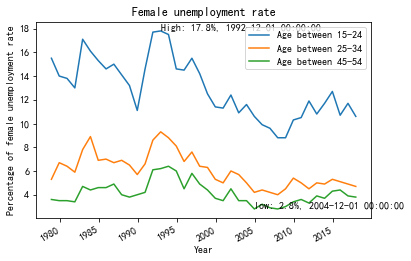

In [105]:


female['Females 15-24 unemployment rate (%)'].plot(label="Age between 15-24")
female['Females 25-34 unemployment rate (%)'].plot(label="Age between 25-34")
female['Females 45-54 unemployment rate (%)'].plot(label="Age between 45-54")



i_max = female['Females 15-24 unemployment rate (%)'].idxmax()
high = female.loc[i_max]['Females 15-24 unemployment rate (%)']
plt.annotate(f"High: {high}%, {i_max}", (i_max, high))



i_min = female['Females 45-54 unemployment rate (%)'].idxmin()
low = female.loc[i_min]['Females 45-54 unemployment rate (%)']
plt.annotate(f"low: {low}%, {i_min}", (i_min, low))

plt.ylabel('Percentage of female unemployment rate')
plt.title('Female unemployment rate')
plt.legend(loc='upper right')
plt.show()

graph 2(male)

In [106]:


filepath = ("1978-2017-australiansdg-indicator-8-5-2a-males.csv")

males = pd.read_csv(filepath)
print("done")



done


In [107]:
males.head(10)

,Month,Males 15-24 unemployment rate (%),Males 25-34 unemployment rate (%),Males 35-44 unemployment rate (%),Males 45-54 unemployment rate (%),Males 55-64 unemployment rate (%),Males 65 and over unemployment rate (%),Males 15 and over unemployment rate (%),Males 15-64 unemployment rate (%)
0,Dec-78,12.0,3.6,3.0,3.3,3.7,-,5.5,5.5
1,Dec-79,11.5,3.5,2.5,2.3,2.9,1.8,5.0,5.1
2,Dec-80,11.3,3.5,2.1,2.7,3.0,1.5,4.9,5.1
3,Dec-81,11.1,4.0,2.6,2.4,3.4,1.4,5.1,5.2
4,Dec-82,17.8,7.4,4.2,4.4,5.2,1.3,9.0,9.1
5,Dec-83,18.4,7.5,5.7,5.7,6.7,1.9,9.2,9.4
6,Dec-84,16.3,6.7,4.5,5.2,6.0,1.6,8.3,8.4
7,Dec-85,14.2,6.1,4.0,4.4,6.5,1.6,7.3,7.3
8,Dec-86,15.6,6.7,4.4,5.1,7.0,1.5,8.2,8.2
9,Dec-87,14.3,6.5,4.3,4.4,6.9,1.3,7.4,7.4


In [128]:
def make_time_1(e):
    try:
        return datetime.strptime(e, "%b-%y")
    except Exception as w:
        return e
males["Year"] = males.Month.apply(make_time)
males.Year.head(10)

Year
1978-12-01 00:00:00    1978-12-01 00:00:00
1979-12-01 00:00:00    1979-12-01 00:00:00
1980-12-01 00:00:00    1980-12-01 00:00:00
1981-12-01 00:00:00    1981-12-01 00:00:00
1982-12-01 00:00:00    1982-12-01 00:00:00
1983-12-01 00:00:00    1983-12-01 00:00:00
1984-12-01 00:00:00    1984-12-01 00:00:00
1985-12-01 00:00:00    1985-12-01 00:00:00
1986-12-01 00:00:00    1986-12-01 00:00:00
1987-12-01 00:00:00    1987-12-01 00:00:00
Name: Year, dtype: object

In [109]:
males = males.set_index("Year")

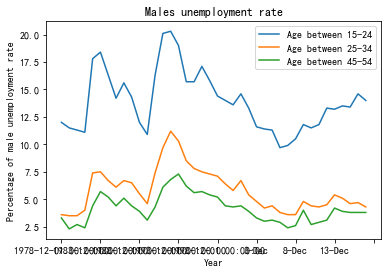

In [110]:

males['Males 15-24 unemployment rate (%)'].plot(label="Age between 15-24")
males['Males 25-34 unemployment rate (%)'].plot(label="Age between 25-34")
males['Males 45-54 unemployment rate (%)'].plot(label="Age between 45-54")





plt.ylabel('Percentage of male unemployment rate')
plt.title('Males unemployment rate')
plt.legend(loc='upper right')
plt.show()

graph 3

In [111]:
file = 'Monthly hours worked in all jobs, Seasonally adjusted.csv'
df  = pd.read_csv(file,delimiter=',',header=1,nrows=121)

In [112]:
df

,Unnamed: 0,Hours worked (m),Yearly change (%)
0,11-Jun,"1,581",1.8
1,11-Jul,"1,582",2.2
2,11-Aug,"1,584",1.3
3,11-Sep,"1,581",1.2
4,11-Oct,"1,592",1.5
...,...,...,...
116,21-Feb,"1,763",-0.4
117,21-Mar,"1,802",2.2
118,21-Apr,"1,789",12.3
119,21-May,"1,814",13.0


In [113]:
# output data from csv and turn it to the list
X = df['Unnamed: 0'].values.tolist()
y1 = df['Hours worked (m)'].values.tolist()
y2 = df['Yearly change (%)'].values.tolist()

In [114]:
Y1 = []
for i in y1:
    Y1.append(int(i.replace(',','')))

In [115]:
y2

[1.8,
 2.2,
 1.3,
 1.2,
 1.5,
 0.9,
 1.2,
 0.5,
 0.4,
 0.8,
 2.8,
 2.0,
 -0.2,
 0.4,
 0.2,
 1.1,
 -0.4,
 0.9,
 0.8,
 0.7,
 1.1,
 0.1,
 0.9,
 0.0,
 1.7,
 1.7,
 2.0,
 0.6,
 1.3,
 0.2,
 0.1,
 -0.2,
 0.2,
 1.0,
 -0.7,
 0.3,
 0.7,
 0.0,
 -0.2,
 0.2,
 0.2,
 0.5,
 -0.1,
 2.0,
 1.3,
 1.4,
 2.4,
 1.6,
 1.0,
 1.5,
 1.4,
 2.3,
 2.8,
 2.6,
 3.2,
 2.0,
 2.2,
 1.4,
 -0.3,
 1.7,
 1.5,
 1.3,
 1.6,
 0.7,
 0.7,
 0.8,
 1.4,
 2.0,
 -0.1,
 1.4,
 2.0,
 2.9,
 3.0,
 2.2,
 2.4,
 3.1,
 3.0,
 3.6,
 2.8,
 0.3,
 3.6,
 2.6,
 4.8,
 1.1,
 2.0,
 2.5,
 2.2,
 2.1,
 2.3,
 1.3,
 1.5,
 3.5,
 2.4,
 2.9,
 1.5,
 2.1,
 1.6,
 1.6,
 1.9,
 1.8,
 1.1,
 1.3,
 2.0,
 0.7,
 0.4,
 -0.7,
 -10.2,
 -9.1,
 -5.7,
 -5.0,
 -5.0,
 -5.0,
 -2.4,
 -1.0,
 -1.6,
 -5.9,
 -0.4,
 2.2,
 12.3,
 13.0,
 6.8]

In [116]:
# Set font and symbol display
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

[Text(0, 0, '11-Jun'),
 Text(3, 0, '11-Sep'),
 Text(6, 0, '11-Dec'),
 Text(9, 0, '12-Mar'),
 Text(12, 0, '12-Jun'),
 Text(15, 0, '12-Sep'),
 Text(18, 0, '12-Dec'),
 Text(21, 0, '13-Mar'),
 Text(24, 0, '13-Jun'),
 Text(27, 0, '13-Sep'),
 Text(30, 0, '13-Dec'),
 Text(33, 0, '14-Mar'),
 Text(36, 0, '14-Jun'),
 Text(39, 0, '14-Sep'),
 Text(42, 0, '14-Dec'),
 Text(45, 0, '15-Mar'),
 Text(48, 0, '15-Jun'),
 Text(51, 0, '15-Sep'),
 Text(54, 0, '15-Dec'),
 Text(57, 0, '16-Mar'),
 Text(60, 0, '16-Jun'),
 Text(63, 0, '16-Sep'),
 Text(66, 0, '16-Dec'),
 Text(69, 0, '17-Mar'),
 Text(72, 0, '17-Jun'),
 Text(75, 0, '17-Sep'),
 Text(78, 0, '17-Dec'),
 Text(81, 0, '18-Mar'),
 Text(84, 0, '18-Jun'),
 Text(87, 0, '18-Sep'),
 Text(90, 0, '18-Dec'),
 Text(93, 0, '19-Mar'),
 Text(96, 0, '19-Jun'),
 Text(99, 0, '19-Sep'),
 Text(102, 0, '19-Dec'),
 Text(105, 0, '20-Mar'),
 Text(108, 0, '20-Jun'),
 Text(111, 0, '20-Sep'),
 Text(114, 0, '20-Dec'),
 Text(117, 0, '21-Mar'),
 Text(120, 0, '21-Jun')]

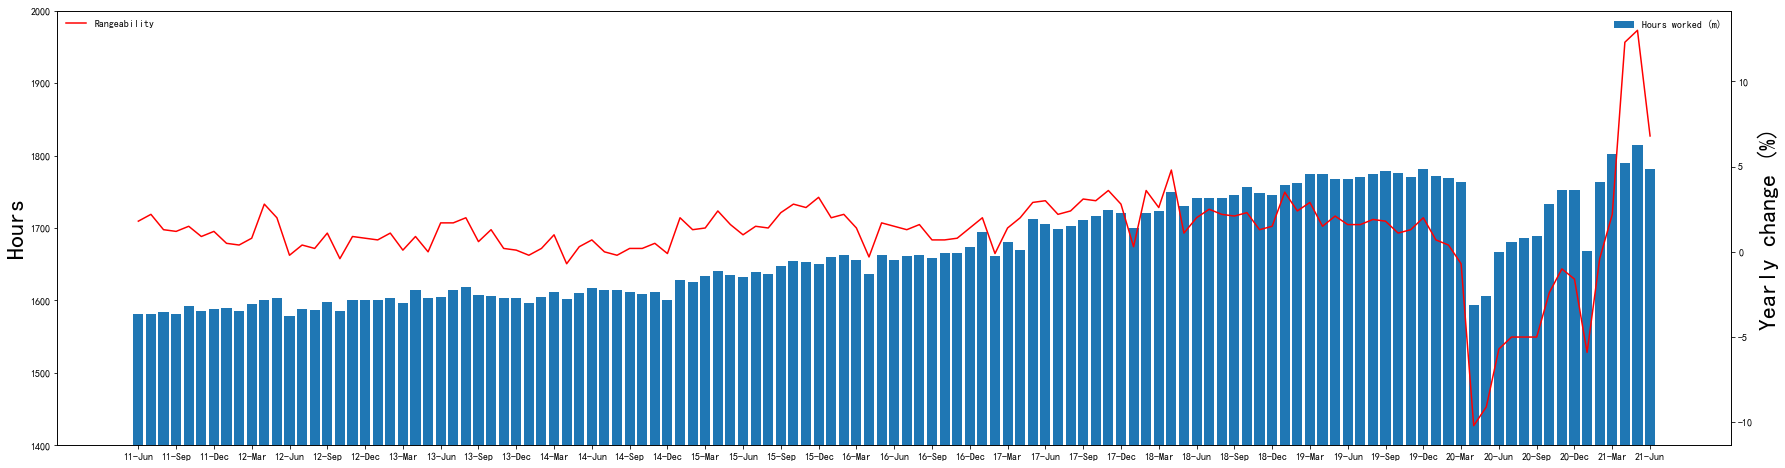

In [117]:
# Set size of table
fig = plt.figure(figsize=(30,8))
ax1 = fig.add_subplot(111)
lns1 = ax1.bar(X,Y1,label='Hours worked (m)')
ax1.set_ylabel('Hours',fontsize=24)
# Set the histogram Y-axis interval
ax1.set_ylim(1400,2000)
# creaat a new backgrround
ax2 = ax1.twinx()
# input line chart values and line color styles and legends
lns2 = ax2.plot(X, y2, 'r-', label= "Rangeability")
# Set the Y-axis name and font size of the line chart
ax2.set_ylabel('Yearly change (%)',fontsize=24)

ax1.legend(loc='best',frameon=False)  # set position of legend
ax2.legend(loc='best',frameon=False)
# The jump shows the X-axis(if too many numbers in x, it avoid congestion between each data)
plt.xticks(range(0,121,3))
ax2.set_xticklabels(X[::3])

graph 4

In [118]:
file = 'RM3.xlsx'
df  = pd.read_excel(file,header=3)

In [119]:
df

,Month,Duration of job search,Greater capital city and rest of state (GCCSA): ASGS (2011),Labour market region (SA4): ASGS (2011),Unemployed total ('000),Number of weeks searching for job ('000 Weeks),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1991-07-01,Under 13 weeks (under 3 months),Greater Sydney,NC Not collected [1960-1998],57.576690,252.449356,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991-07-01,Under 13 weeks (under 3 months),Rest of NSW,NC Not collected [1960-1998],35.821510,169.988454,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1991-07-01,Under 13 weeks (under 3 months),Greater Melbourne,NC Not collected [1960-1998],57.782074,273.030760,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1991-07-01,Under 13 weeks (under 3 months),Rest of Vic.,NC Not collected [1960-1998],15.820991,78.374796,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1991-07-01,Under 13 weeks (under 3 months),Greater Brisbane,NC Not collected [1960-1998],27.787926,127.779190,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71493,2021-06-01,52 weeks and over (12 months and over),Rest of Tas.,603 Tasmania - South East,0.299243,27.400021,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71494,2021-06-01,52 weeks and over (12 months and over),Rest of Tas.,604 Tasmania - West and North West,0.824445,241.850698,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71495,2021-06-01,52 weeks and over (12 months and over),Northern Territory,701 Darwin,1.229002,181.270371,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71496,2021-06-01,52 weeks and over (12 months and over),Northern Territory,702 Northern Territory - Outback,1.534802,265.246263,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
# take data out of csv and turn to list
year = df['Month'].values.tolist()
y = df['Duration of job search'].values.tolist()
data = df["Number of weeks searching for job ('000 Weeks)"].values.tolist()

In [121]:
lists = []
for i in year:
    timeArray = time.localtime(int(str(i)[:9]))
    otherStyleTime = time.strftime("%Y--%m--%d %H:%M:%S", timeArray)
    lists.append(otherStyleTime[:4])


In [122]:
data = df["Number of weeks searching for job ('000 Weeks)"]

start = 1
lists = []
for j,i in enumerate(year):
    if str(i)[:1] == '1':
        timeArray = time.localtime(int(str(i)[:10]))
        otherStyleTime = time.strftime("%Y--%m--%d %H:%M:%S", timeArray)
        if int(otherStyleTime[:4])>=2011:
            lists.append(otherStyleTime[:4])
            if start == 1:
                zhi = j
                start = 2

In [123]:
dicts = {


}
for i,j in enumerate(lists):
    try:
        dicts[j][y[i]]+=float(data[i])*1000

    except:
        try:
            if dicts[j]:
                dicts[j][y[i]] =float(data[i])*1000
        except:
            dicts[j] = {}
            dicts[j][y[i]] =float(data[i])*1000



In [124]:
yearsa = dicts.keys()
years = []
Under = []
weeks_13 = []
weeks_52 = []
for i in yearsa:
    years.append(i)

In [125]:
for i in dicts.values():
    Under.append(i['Under 13 weeks (under 3 months)'])
    weeks_13.append(i['13 weeks and under 52 weeks (3-12 months)'])
    weeks_52.append(i['52 weeks and over (12 months and over)'])

In [126]:
tick_step=1
group_gap=0.2
bar_gap=0
datas = [Under,weeks_13,weeks_52]
name = ['Under 13 weeks (under 3 months)','13 weeks and under 52 weeks (3-12 months)','52 weeks and over (12 months and over)']

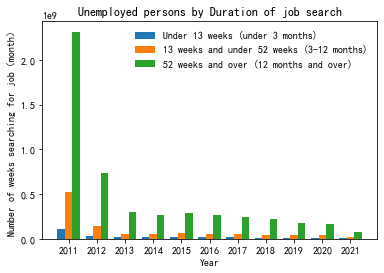

In [127]:
x = np.arange(len(years)) * tick_step
#  group_num is number of group data（amount of colume）
group_num = len(datas)
# group_width is width of colume，group_gap is distancce of gap between colume
group_width = tick_step - group_gap
# bar_span is gap between each colume groups in x-axis, it's sum of width and gap
bar_span = group_width / group_num
# bar_width is actural width of colume
bar_width = bar_span - bar_gap
# built columns
for index, y in enumerate(datas):
    plt.bar(x + index*bar_span, y, bar_width,label=name[index])
plt.ylabel('Number of weeks searching for job（month）')
plt.title('Unemployed persons by Duration of job search')
# Ticks is the position of the new x axis calibration label, namely the center position on the X axis of each group of columns
ticks = x + (group_width - bar_span) / 2
plt.xticks(ticks, years)
plt.legend(loc='best',frameon=False)  # Set the legend location
plt.xlabel('Year')
plt.show()


